<a href="https://colab.research.google.com/github/akash-yede/Twittorials/blob/master/Analyze_website_crawls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Do you know how well search engines crawl your website?</b></h1>

You can analyze if a search engine is able to crawl all the webpages on your website. Let's have a look how to do it today.

You will need an XML sitemap of your website and a log file. An XML sitemap is a list of your website's urls and acts as a roadmap for search engines to tell them how to reach a webpage. A server log file is a text file stored on your web server that contains raw and unfiltered traffic data.

Please note - For our example, we have already filtered the logs for Googlebot inside the log file.

Let's start by importing the log file and the xml sitemap file. Note that the log file is a text file and the sitemap is an xml file.

In [1]:
from google.colab import files
#Code for importing files in colab
uploaded = files.upload()

Saving log_file_.txt to log_file_.txt
Saving xml_file.xml to xml_file.xml


In [2]:
#Saving the log file as file1
# and xml file as file2
file1 = open('log_file_.txt', 'r')

We need to install the clfparser library. We're using this library to fetch all the url paths from the log file.

A log file contains a lot of data. We need all the url path from the file. In he next block, we have written a regular expression to fetch all url path from the file.

In [3]:
!pip install clfparser

  Created wheel for clfparser: filename=clfparser-0.3-cp36-none-any.whl size=3428 sha256=549d5d1cfe540141c6069e3335e690ca4116127889862dcfb33d9d2b1762c6c8
  Stored in directory: /root/.cache/pip/wheels/c2/ba/24/b143226459d4b0199bad8201ac691de3d909ba7b4c4dd04f3b
Successfully built clfparser


We are creating two lists here. We are using list1 here to list all the urls from the log file.

In [4]:
from clfparser import CLFParser
list1 = []
for line in file1:
  urlDict = CLFParser.logDict(line)
  urlRequests = urlDict.get('r')

  if " " in urlRequests:
    urlPath = urlRequests.split(" ")[1]
    list1.append(urlPath)    

In [5]:
print(list1)

['/3-steps-to-choosing-the-right-wiper-shop-towel-or-rag', '/expertadvice/can-i-mix-contents-punctured-aerosol-cans/', '/aerosol-hazardous-waste-reduction', '/toolbox-talk-personal-protective-equipment', '/epa-issues-guidance-document-for-closed-containers', '/action/recommendations/?id=reco241&productCode=MAT240&componentId=compoRecoProduct', '/example-absorbent-mat-pad-in-dispenser-box/p/MAT135', '/replacement-gas-shock-absorber-for-example-waste-compactor/p/DRM5002', '/action/recommendations/?id=reco406&productCode=DRM5002&componentId=compoRecoProduct']


Next, we have to parse all the url paths from the xml file. We're using the BeautifulSoup library here for this purpose.

In [6]:
from bs4 import BeautifulSoup
with open("xml_file.xml") as fp:
    soup = BeautifulSoup(fp)

In [7]:
listUrls = []
for url in soup.findAll('url'):
    for loc in url.findAll('loc'):
      listUrls.append(str(loc))

We're listing all the url paths from teh xml file and storing them in list2.

In [8]:
list2 = []
for url in listUrls:
    left_split = url.split(".com")[1]
    splitted_url = left_split.split("<")[0]
    list2.append(splitted_url)

In [9]:
print(list2)

['/grippyvideo', '/no-nuts-no-bolts-no-fuss-example-drum-lids-operate-with-one-hand', "/see-why-the-copycats-can't-beat-grippy-mat-the-world's-first-adhesive-backed-mat", '/see-why-example-mat-is-the-no-1-mat-in-the-world', '/see-why-example-mat-is-the-no-1-mat-in-the-world', '/how-to-use-the-grippy-mat-installation-board', '/3-steps-to-choosing-the-right-wiper-shop-towel-or-rag', '/can-i-mix-contents-punctured-aerosol-cans', '/toolbox-talk-personal-protective-equipment', '/epa-issues-guidance-document-for-closed-containers', '/2018-holiday-video']


Now we have the url paths from the log file and the xml file and we're all set to start our analysis.

In [18]:
#Listing the pages in sitemap and not crawled by google
list_nocrawl = [] 

for b in list2:
  if(b not in list1):
    list_nocrawl.append(b)

In [19]:
print(list_nocrawl)
len_left = len(list_nocrawl)
print(len_left)

['/grippyvideo', '/no-nuts-no-bolts-no-fuss-example-drum-lids-operate-with-one-hand', "/see-why-the-copycats-can't-beat-grippy-mat-the-world's-first-adhesive-backed-mat", '/see-why-example-mat-is-the-no-1-mat-in-the-world', '/see-why-example-mat-is-the-no-1-mat-in-the-world', '/how-to-use-the-grippy-mat-installation-board', '/can-i-mix-contents-punctured-aerosol-cans', '/2018-holiday-video']
8


In [20]:
#Listing the pages not in sitemap but crawled by google
list_nositemap = [] 

for a in list1:
  if(a not in list2):
    list_nositemap.append(a)

In [21]:
print(list_nositemap)
len_right = len(list_nositemap)
print(len_right)

['/expertadvice/can-i-mix-contents-punctured-aerosol-cans/', '/aerosol-hazardous-waste-reduction', '/action/recommendations/?id=reco241&productCode=MAT240&componentId=compoRecoProduct', '/example-absorbent-mat-pad-in-dispenser-box/p/MAT135', '/replacement-gas-shock-absorber-for-example-waste-compactor/p/DRM5002', '/action/recommendations/?id=reco406&productCode=DRM5002&componentId=compoRecoProduct']
6


In [22]:
#Listing all the pages crawled by google and also in the sitemap
list_common = []
for a in list1:
  for b in list2:
    if(a == b):
      list_common.append(a)

In [23]:
print(list_common)
len_common = len(list_common)
print(len_common)

['/3-steps-to-choosing-the-right-wiper-shop-towel-or-rag', '/toolbox-talk-personal-protective-equipment', '/epa-issues-guidance-document-for-closed-containers']
3


To visualize this, we can create a venn diagram.

1. The left side of the venn diagram shows the number of pages that are in the sitemap and not crawled by google.
2. The right side of the venn diagram shows the number of pages that are not in the sitemap but are crawled by google.
3. The intersection part shows the urls that are present in teh sitemap and also crawled by google.

In [24]:
#Importing the matplotlib library
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
%matplotlib inline

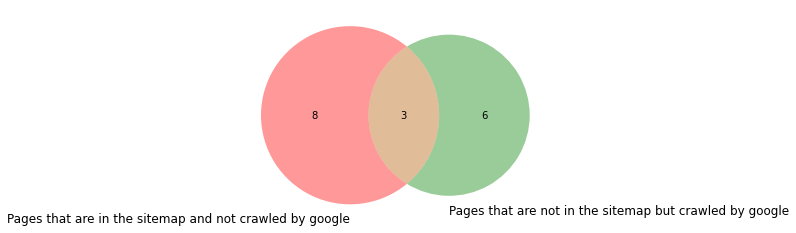

In [25]:
venn2(subsets = (len_left, len_right, len_common), set_labels = ('Pages that are in the sitemap and not crawled by google', 'Pages that are not in the sitemap but crawled by google'))

This shows that there are 3 important pages that are in the sitemap and also crawled by google. 